In [7]:
import os
from groq import Groq
groq_api_key = "key"  #removed for security reasons

In [8]:
client = Groq(api_key=groq_api_key)

In [46]:
import pandas as pd

In [86]:
df = pd.read_csv('household_power_consumption.txt',
             	sep=';',
             	parse_dates={'datetime': ['Date', 'Time']},
             	infer_datetime_format=True,
             	na_values=['?'],
             	low_memory=False)

df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

/tmp/ipykernel_22398/347334682.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt',
/tmp/ipykernel_22398/347334682.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt',


In [48]:
print(df)

                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2010-11-26 20:58:00                0.946                  0.000   240.43   
2010-11-26 20:59:00                0.944                  0.000   240.00   
2010-11-26 21:00:00                0.938                  0.000   239.82   
2010-11-26 21:01:00                0.934                  0.000   239.70   
2010-11-26 21:02:00                0.932                  0.000   239.55   

           

In [ ]:
#q1: What was the average active power consumption in March 2007?

In [11]:
#question 1 grok query

from IPython.display import Markdown

chat_completion = client.chat.completions.create(
 model="llama3-70b-8192",
 messages=[{"role": "user", "content": "Hello, Groq! I have a pandas dataframe with the following colums: datetime, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3.datetime colums is the index. Generate pandas code to calculate the average active power consumption in March 2007 given an example datetime format is 2010-02-11 where 2010 is the yera, 02 is the month and 11 is the day."}])

print(chat_completion.choices[0].message.content)
# Convert the output to Markdown
#Markdown(chat_completion.choices[0].message.content)

You can filter the data for March 2007 and then calculate the mean of Global_active_power. 

Here is the code:

```
average_active_power = df.loc[(df.index.year == 2007) & (df.index.month == 3), 'Global_active_power'].mean()
```

This code will return the average active power consumption in March 2007.


In [45]:
#Running groq question 1 code to get results

In [49]:
average_active_power = df.loc[(df.index.year == 2007) & (df.index.month == 3), 'Global_active_power'].mean()
print(average_active_power)

1.3186270301754073


In [50]:
#Verification of question 1 answer

In [54]:
start_date = '2007-03-01'
end_date = '2007-03-31'

In [55]:
filtered_df = df.loc[start_date:end_date]

In [56]:
value = filtered_df['Global_active_power'].mean()
print(value)

1.3186270301754073


In [ ]:
#q2: What hour of the day had the highest power usage on Christmas 2006?

In [14]:
#question 2 qrok query

from IPython.display import Markdown

chat_completion = client.chat.completions.create(
 model="llama3-70b-8192",
 messages=[{"role": "user", "content": "Hello, Groq! What hour of the day had the highest Global_active_power on Christmas Day 2006, given a DataFrame with a datetime index and a Global_active_power column? Give me the pandas code while considering the series attribute hour"}])

#print(chat_completion.choices[0].message.content)
# Convert the output to Markdown
Markdown(chat_completion.choices[0].message.content)

A festive question!

Here's the pandas code to find the hour with the highest Global_active_power on Christmas Day 2006:
```python
import pandas as pd

# assume 'df' is your DataFrame with a datetime index and a 'Global_active_power' column

# filter data for Christmas Day 2006
christmas_day_2006 = df[(df.index.year == 2006) & (df.index.month == 12) & (df.index.day == 25)]

# group by hour and compute the max Global_active_power for each hour
hourly_max_power = christmas_day_2006.groupby(christmas_day_2006.index.hour)['Global_active_power'].max()

# find the hour with the highest Global_active_power
print("Hour with highest Global_active_power on Christmas Day 2006:")
print(hourly_max_power.idxmax())
```
Here's what's happening:

1. We filter the data to only include rows where the year is 2006, month is December (12), and day is 25 (Christmas Day).
2. We group the filtered data by the `hour` attribute of the datetime index. This creates a group for each hour of the day (0 to 23).
4. We compute the maximum `Global_active_power` for each hour using `.max()`. This gives us a Series with the maximum power for each hour.
5. Finally, we use `.idxmax()` to find the hour with the maximum power.

Note: If there are multiple hours with the same maximum power, `.idxmax()` will return the first one it encounters.

In [58]:
#Running groq question 2 code to get results

In [59]:
christmas_day_2006 = df[(df.index.year == 2006) & (df.index.month == 12) & (df.index.day == 25)]

# group by hour and compute the max Global_active_power for each hour
hourly_max_power = christmas_day_2006.groupby(christmas_day_2006.index.hour)['Global_active_power'].max()

# find the hour with the highest Global_active_power
print("Hour with highest Global_active_power on Christmas Day 2006:")
print(hourly_max_power.idxmax())

Hour with highest Global_active_power on Christmas Day 2006:
21


In [61]:
#Verification of question 2 answer

In [62]:
single_day_df = df.loc['2006-12-25']
print(single_day_df.head(5))

                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-25 00:00:00                0.586                  0.260   243.65   
2006-12-25 00:01:00                0.584                  0.258   243.26   
2006-12-25 00:02:00                0.648                  0.324   243.00   
2006-12-25 00:03:00                0.654                  0.360   242.66   
2006-12-25 00:04:00                0.656                  0.364   243.11   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-25 00:00:00               2.6             0.0             1.0   
2006-12-25 00:01:00               2.6             0.0             1.0   
2006-12-25 00:02:00               3.0             0.0             2.0   
2006-12-25 00:03:00               3.0             0.0             1.0   
2006-12-25 00:04:00          

In [63]:
max_row = single_day_df.loc[single_day_df['Global_active_power'].idxmax()]
print(max_row)

Global_active_power        6.702
Global_reactive_power      0.000
Voltage                  236.450
Global_intensity          28.200
Sub_metering_1            38.000
Sub_metering_2            36.000
Sub_metering_3            17.000
Name: 2006-12-25 21:46:00, dtype: float64


In [64]:
hour = max_row.name.hour
print("Hour:", hour)

Hour: 21


In [ ]:
#q3: Compare energy usage (Global_active_power) on weekdays vs weekends.

In [16]:
#question 3 grok query

from IPython.display import Markdown

chat_completion = client.chat.completions.create(
 model="llama3-70b-8192",
 messages=[{"role": "user", "content": "Hello, Groq! I have a pandas dataframe with the following colums: datetime, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3.datetime colums is the index. Generate pandas code to compare the energy usage(Global_active_power) on weekdays vs weekends. Make sure the code is correct"}])

#print(chat_completion.choices[0].message.content)
# Convert the output to Markdown
Markdown(chat_completion.choices[0].message.content)

Here is the code to compare the energy usage on weekdays vs weekends:
```
import pandas as pd

# assume 'df' is your dataframe

# extract day of the week from datetime index
df['day_of_week'] = df.index.dayofweek

# map day of week to weekday/weekend categories
df['weekday_weekend'] = df['day_of_week'].apply(lambda x: 'weekday' if x < 5 else 'weekend')

# group by weekday/weekend energy_usage = df.groupby('weekday_weekend')['Global_active_power'].mean()

print(energy_usage)
```
Here's what's happening:

1. We extract the day of the week from the datetime index using `dayofweek`, which returns an integer from 0 (Monday) to 6 (Sunday).
2. We create a new column `weekday_weekend` by applying a lambda function to the `day_of_week` column. If the day is Monday to Friday (0-4), we assign 'weekday', otherwise 'weekend'.
3. We group the dataframe by the `weekday_weekend` column and calculate the mean of `Global_active_power` for each group using `groupby` and `mean`.
4. Finally, we print the resulting series, which should show the average energy usage on weekdays and weekends.

Note: Make sure your datetime index is in a datetime format that pandas understands. If your index is not a datetime index, you may need to convert it using `pd.to_datetime()` before running this code.

In [65]:
#Running groq question 3 code to get results

In [66]:
# assume 'df' is your dataframe

# extract day of the week from datetime index
df['day_of_week'] = df.index.dayofweek

# map day of week to weekday/weekend categories
df['weekday_weekend'] = df['day_of_week'].apply(lambda x: 'weekday' if x < 5 else 'weekend')

# group by weekday/weekend 
energy_usage = df.groupby('weekday_weekend')['Global_active_power'].mean()

print(energy_usage)

weekday_weekend
weekday    1.035472
weekend    1.234232
Name: Global_active_power, dtype: float64


In [68]:
#Verification of question 3 answer

In [96]:
df['day_type'] = df.index.weekday.map(lambda x: 'Weekday' if x < 5 else 'Weekend')
weekday_vs_weekend_usage = df.groupby('day_type')['Global_active_power'].mean()
print(weekday_vs_weekend_usage)

day_type
Weekday    1.035472
Weekend    1.234232
Name: Global_active_power, dtype: float64


In [ ]:
#q4: Find days where energy consumption exceeded 5 kWh.

In [38]:
#question 4 groq query

from IPython.display import Markdown

chat_completion = client.chat.completions.create(
 model="llama3-70b-8192",
 messages=[{"role": "user", "content": "Hello, Groq! I have a pandas DataFrame where each row represents an energy reading, and the datetime is the index. There's a column called 'Global_active_power'. I want to find all dates where any reading in a day exceeds 5 kWh. Write pandas code to do this."}])

print(chat_completion.choices[0].message.content)
# Convert the output to Markdown
#Markdown(chat_completion.choices[0].message.content)

Nice to help!

Here's the pandas code to find all dates where any reading in a day exceeds 5 kWh:
```python
import pandas as pd

# assume your DataFrame is called 'df'

exceeding_days = df.resample('D')['Global_active_power(in kwh)'].apply(lambda x: x.max() > 5).index

print(exceeding_days)
```
Let me explain what's happening:

1. `resample('D')` groups the data by day, using the datetime index.
2. `['Global_active_power(in kwh)']` selects only the column of interest.
4. `apply(lambda x: x > 5)` applies a lambda function to each group (i.e., each day). The lambda function checks if any reading in the day exceeds 5 kWh.
5. `.index` returns the dates where the condition is True.

The resulting `exceeding_days` Series contains the dates where any reading in a day exceeds 5 kWh.


In [69]:
#Running groq question 4 code to get results

In [70]:
exceeding_days = df.resample('D')['Global_active_power'].apply(lambda x: x.max() > 5).index
print(exceeding_days)

DatetimeIndex(['2006-12-16', '2006-12-17', '2006-12-18', '2006-12-19',
               '2006-12-20', '2006-12-21', '2006-12-22', '2006-12-23',
               '2006-12-24', '2006-12-25',
               ...
               '2010-11-17', '2010-11-18', '2010-11-19', '2010-11-20',
               '2010-11-21', '2010-11-22', '2010-11-23', '2010-11-24',
               '2010-11-25', '2010-11-26'],
              dtype='datetime64[ns]', name='datetime', length=1442, freq='D')


In [72]:
#Verification of question 4 answer

In [73]:
df.index = pd.to_datetime(df.index)
high_readings = df['Global_active_power'] > 5
days_with_high_consumption = high_readings.groupby(df.index.date).any()
high_consumption_days = days_with_high_consumption[days_with_high_consumption].index
high_consumption_days = pd.to_datetime(high_consumption_days)
print(high_consumption_days)

DatetimeIndex(['2006-12-16', '2006-12-17', '2006-12-18', '2006-12-19',
               '2006-12-20', '2006-12-21', '2006-12-22', '2006-12-23',
               '2006-12-24', '2006-12-25',
               ...
               '2010-11-09', '2010-11-10', '2010-11-11', '2010-11-13',
               '2010-11-15', '2010-11-17', '2010-11-20', '2010-11-22',
               '2010-11-24', '2010-11-25'],
              dtype='datetime64[ns]', length=905, freq=None)


In [ ]:
#q5: Plot the energy usage trend for the first week of January 2007.

In [42]:
#question 5 qrok query

from IPython.display import Markdown

chat_completion = client.chat.completions.create(
 model="llama3-70b-8192",
 messages=[{"role": "user", "content": "Hello, Groq! I have a pandas DataFrame where the index is a datetime column, and one of the columns is 'Global_active_power'. I want to plot the energy usage trend (line chart) for the first week of January 2007. Generate pandas + matplotlib code to do this. Give correct code"}])

print(chat_completion.choices[0].message.content)
# Convert the output to Markdown
#Markdown(chat_completion.choices[0].message.content)

Here is the code to plot the energy usage trend for the first week of January 2007:
```
import pandas as plt
import matplotlib.pyplot as plt

# assume your dataframe is named 'df'

# filter the data for the first week of January 2007
start_date = '2007-01-01'
end_date = '2007-01-07'
df_first_week = df[(df.index >= start_date) & (df.index <= end_date)]

# plot the energy usage trend
plt.figure(figsize=(10,6))
plt.plot(df_first_week.index, df_first_week['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.title('Energy Usage Trend - First Week of January 2007')
plt.show()
```
This code filters the data for the first week of January 2007 using boolean indexing, and then plots the `Global_active_power` column against the index (datetime column) using `matplotlib`.


In [74]:
#Running groq question 5 code to get results

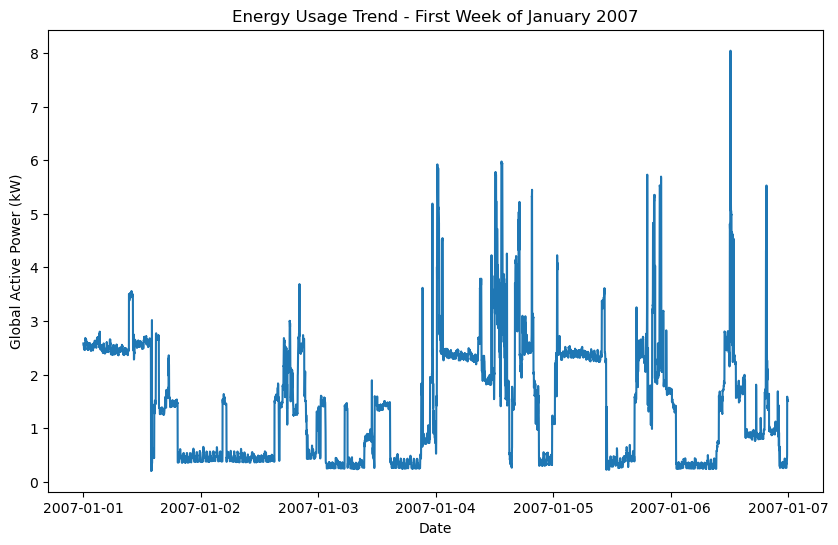

In [76]:
import matplotlib.pyplot as plt

start_date = '2007-01-01'
end_date = '2007-01-07'
df_first_week = df[(df.index >= start_date) & (df.index <= end_date)]

# plot the energy usage trend
plt.figure(figsize=(10,6))
plt.plot(df_first_week.index, df_first_week['Global_active_power'])
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.title('Energy Usage Trend - First Week of January 2007')
plt.show()

In [77]:
#Verification of question 5 answer

In [78]:
start_date = '2007-01-01'
end_date = '2007-01-07'

In [79]:
filtered_df = df.loc[start_date:end_date]

In [80]:
power = filtered_df['Global_active_power']

In [81]:
power_indices = power.index

In [82]:
power_values = power.values

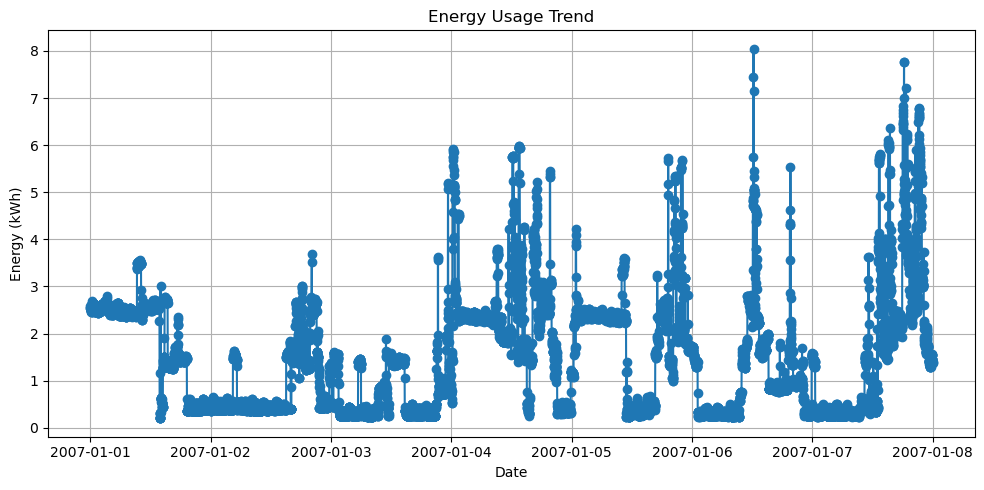

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
dates = power_indices
energy_usage = power_values

# Convert dates to datetime
dates = pd.to_datetime(dates)

# Create a DataFrame (optional but useful)
df = pd.DataFrame({'Date': dates, 'Energy_kWh': energy_usage})

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Energy_kWh'], marker='o', linestyle='-')
plt.title('Energy Usage Trend')
plt.xlabel('Date')
plt.ylabel('Energy (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#q6: Find the average voltage for each day of the first week of February 2007.

In [43]:
#question 6 qrok query

from IPython.display import Markdown

chat_completion = client.chat.completions.create(
 model="llama3-70b-8192",
 messages=[{"role": "user", "content": "I have a pandas DataFrame where each row represents an energy reading, and the datetime is the index. There's a column called 'Voltage'. I want to find the average voltage for each day of the first week of february 2007. Write pandas code to do this."}])

print(chat_completion.choices[0].message.content)
# Convert the output to Markdown
#Markdown(chat_completion.choices[0].message.content)

You can use the `resample` function in pandas to compute the average voltage for each day of the first week of February 2007:
```
df.loc['2007-02-01':'2007-02-07'].resample('D')['Voltage'].mean()
```
Here's how it works:

* `df.loc['2007-02-01':'2007-02-07']` selects only the rows where the index (datetime) falls between February 1st and February 7th, 2007.
* `resample('D')` groups the selected rows by day (i.e., each day becomes a separate group).
* `['Voltage']` selects only the 'Voltage' column.
* `.mean()` computes the average value of the 'Voltage' column for each day.

This will give you a new DataFrame with a datetime index (February 1st to February 7th) and a single column with the average voltage for each day.

Note: Make sure your datetime index is in the format `YYYY-MM-DD HH:MM:SS` for this to work correctly.


In [84]:
#Running groq question 6 code to get results

In [87]:
df.loc['2007-02-01':'2007-02-07'].resample('D')['Voltage'].mean()

datetime
2007-02-01    240.392139
2007-02-02    240.334389
2007-02-03    238.910194
2007-02-04    239.633333
2007-02-05    240.810312
2007-02-06    241.264160
2007-02-07    241.149694
Freq: D, Name: Voltage, dtype: float64

In [88]:
#Verification of question 6 answer

In [89]:
start_date = '2007-02-01'
end_date = '2007-02-07'

In [90]:
february_df = df.loc[start_date:end_date]

In [91]:
day_groups = february_df.groupby(february_df.index.date)
mean_group = day_groups.mean()
avg_voltage = mean_group['Voltage']
print(avg_voltage)

2007-02-01    240.392139
2007-02-02    240.334389
2007-02-03    238.910194
2007-02-04    239.633333
2007-02-05    240.810312
2007-02-06    241.264160
2007-02-07    241.149694
Name: Voltage, dtype: float64


In [ ]:
#q7: What is the correlation between global active power and sub-metering values?

In [44]:
#question 7 groq query

from IPython.display import Markdown

chat_completion = client.chat.completions.create(
 model="llama3-70b-8192",
 messages=[{"role": "user", "content": "I have a pandas dataframe with the following colums: datetime, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3.datetime colums is the index. Generate pandas code to find the correlation between gloabl active power and sub metering values."}])

#print(chat_completion.choices[0].message.content)
# Convert the output to Markdown
Markdown(chat_completion.choices[0].message.content)

You can use the `corr()` function to calculate the correlation between Global_active_power and Sub_metering values. Here is the pandas code:
```
import pandas as pd

# assuming your dataframe is named df

correlations = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()

print(correlations)
```
This will output a 4x4 correlation matrix, where the rows and columns correspond to the columns specified in the `corr()` function.

If you want to extract the correlation coefficients specifically between Global_active_power and each Sub_metering column, you can do:
```
correlations = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr().loc['Global_active_power', ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

print(correlations)
```
This will output a Series with the correlation coefficients between Global_active_power and each Sub_metering column.

In [92]:
#Running groq question 7 code to get results

In [93]:
correlations = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr().loc['Global_active_power', ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

print(correlations)

Sub_metering_1    0.484401
Sub_metering_2    0.434569
Sub_metering_3    0.638555
Name: Global_active_power, dtype: float64


In [94]:
#Verification of question 7 answer

In [95]:
df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr().loc['Global_active_power', ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

Sub_metering_1    0.484401
Sub_metering_2    0.434569
Sub_metering_3    0.638555
Name: Global_active_power, dtype: float64